In [4]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [5]:
# hyper parameter
input_size = 28 * 28 # image size of MNIST data
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 1e-3

In [6]:
# MNIST dataset
train_dataset = dsets.MNIST(root = '/Users/macbook/Documents/Programme/pytorch/Data/Mnist ', #选择数据的根目录
                           train = True, # 选择训练集
                           transform = transforms.ToTensor(), #转换成tensor变量
                           download = True) # 不从网络上download图片
test_dataset = dsets.MNIST(root = '/Users/macbook/Documents/Programme/pytorch/Data/Mnist ', #选择数据的根目录
                           train = False, # 选择训练集
                           transform = transforms.ToTensor(), #转换成tensor变量
                           download = True) # 不从网络上download图片


Processing...
Done!


In [8]:
#加载数据
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)  # 将数据打乱

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [9]:
#input_size = 2
hidden_size = 100
#num_classes = 3

# 创建神经网络模型
class neural_net(nn.Module):
    def __init__(self, input_num,hidden_size, out_put):
        super(neural_net, self).__init__()
        self.fc1 = nn.Linear(input_num, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, out_put)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = neural_net(input_size, hidden_size, num_classes)
print(model)

neural_net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [10]:
# optimization
learning_rate = 1e-3
num_epoches = 5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(num_epoches):

    #inputs = Variable(torch.from_numpy(train_x))
    #targets = Variable(torch.from_numpy(train_y))

    #print(inputs)
    #print(targets)

    #optimizer.zero_grad()
    #outputs = model(inputs)
    #loss = criterion(outputs, targets)
    #loss.backward()
    #optimizer.step()

    #print('current loss = %.5f' % loss.data[0])
    print('current epoch = %d' % epoch)
    for i, (images, labels) in enumerate(train_loader): #利用enumerate取出一个可迭代对象的内容
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print('current loss = %.5f' % loss.data[0])

current epoch = 0


/Users/macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


current loss = 2.30338
current loss = 0.35200
current loss = 0.28127
current loss = 0.30987
current loss = 0.34055
current loss = 0.22123
current epoch = 1
current loss = 0.27865
current loss = 0.17143
current loss = 0.33734
current loss = 0.13760
current loss = 0.20712
current loss = 0.15807
current epoch = 2
current loss = 0.37446
current loss = 0.09010
current loss = 0.10322
current loss = 0.11777
current loss = 0.19931
current loss = 0.08411
current epoch = 3
current loss = 0.11892
current loss = 0.13711
current loss = 0.06706
current loss = 0.15086
current loss = 0.12371
current loss = 0.18483
current epoch = 4
current loss = 0.06356
current loss = 0.04733
current loss = 0.15089
current loss = 0.02418
current loss = 0.09737
current loss = 0.14146


In [11]:
# 做 prediction
total = 0
correct = 0

for images, labels in test_loader:

    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)

    _, predicts = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicts == labels).sum()

print('Accuracy = %.2f' % (100 * correct / total))

Accuracy = 97.00


In [12]:
# shutil －一种高层次的文件操作工具，强大之处是在对文件的复制与删除操作支持比较好
import os
import shutil

In [13]:
# 建立data文件夹用于存放数据，train和val分别存放训练集和验证集
# .mkdir的函数用于建立该路径下的文件夹
os.mkdir('/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data')
os.mkdir('/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/train')
os.mkdir('/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/val')

In [14]:
import pandas as pd

In [16]:
idLabel = pd.read_csv('/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/trainLabels.csv')

In [58]:
train_root = '/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/train'

for label in idLabel.label.unique():
    os.mkdir(os.path.join(train_root, label))

In [56]:
val_root = '/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/val'

for label in idLabel.label.unique():
    os.mkdir(os.path.join(val_root, label))

In [24]:
# .listdir主要用于列出该路径下所有的文件的名称，以列表的形式得到
# 这里的路径是# 下载下来的猫狗大战的训练集数据存放的路径
data_file = os.listdir('/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/zip/train')

In [47]:
import numpy as np
idLabel_train = np.array(idLabel[['id','label']])[:48000]
idLabel_val = np.array(idLabel[['id','label']])[48000:]

In [59]:
# 分割小狗的数据集，如果i < len(dog_file)*0.9，那么就将其放到用来存放数据集的文件夹下的训练集的小狗文件夹中
# 否则便存放在验证集
root = '/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/'

for (id,label) in idLabel_train:
    
    pic_path = root + 'zip/train/' + str(id) + '.png'
    
    obj_path = train_root + '/' + str(label) + '/' + str(id) + '.png'
    
    shutil.copy(pic_path, obj_path)

In [60]:
# 分割小狗的数据集，如果i < len(dog_file)*0.9，那么就将其放到用来存放数据集的文件夹下的训练集的小狗文件夹中
# 否则便存放在验证集
root = '/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/'

for (id,label) in idLabel_val:
    
    pic_path = root + 'zip/train/' + str(id) + '.png'
    
    obj_path = val_root + '/' + str(label) + '/' + str(id) + '.png'
    
    shutil.copy(pic_path, obj_path)

In [64]:
%matplotlib inline

# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [77]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join('/Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/', x), transform) 
                  for x in ['train', 'val']}

In [78]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 48000
     Root Location: /Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/train
     Transforms (if any): Compose(
                              ToTensor()
                          )
     Target Transforms (if any): None, 'val': Dataset ImageFolder
     Number of datapoints: 2000
     Root Location: /Users/macbook/Documents/Programme/pytorch/Data/CIFAR-10/Data/val
     Transforms (if any): Compose(
                              ToTensor()
                          )
     Target Transforms (if any): None}

In [79]:
# 得到可batch的数据格式
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

In [80]:
# 得到分类
class_names = image_datasets['train'].classes

tensor([ 5,  5,  9,  6])


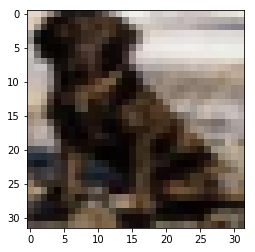

tensor([ 8,  8,  0,  2])


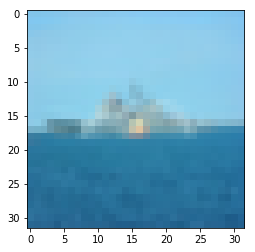

tensor([ 0,  0,  3,  9])


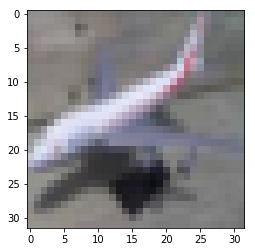

In [82]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)



# Get a batch of training data
next(iter(dataloaders['train']))
# inputs, classes = next(iter(dataloaders['train']))

# # Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])

to_pil_image = transforms.ToPILImage()
cnt = 0
for image,label in dataloaders['val']:
    if cnt>=3:      # 只显示3张图片
        break
    print(label)    # 显示label

    # 方法1：Image.show()
    # transforms.ToPILImage()中有一句
    # npimg = np.transpose(pic.numpy(), (1, 2, 0))
    # 因此pic只能是3-D Tensor，所以要用image[0]消去batch那一维
    img = to_pil_image(image[0])
    img.show()

    # 方法2：plt.imshow(ndarray)
    img = image[0]      # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
    img = img.numpy()   # FloatTensor转为ndarray
    img = np.transpose(img, (1,2,0))    # 把channel那一维放到最后

    # 显示图片
    plt.imshow(img)
    plt.show()

    cnt += 1

In [ ]:
to_pil_image = transforms.ToPILImage()
cnt = 0
for image,label in data_loader:
    if cnt>=3:      # 只显示3张图片
        break
    print(label)    # 显示label

    # 方法1：Image.show()
    # transforms.ToPILImage()中有一句
    # npimg = np.transpose(pic.numpy(), (1, 2, 0))
    # 因此pic只能是3-D Tensor，所以要用image[0]消去batch那一维
    img = to_pil_image(image[0])
    img.show()

    # 方法2：plt.imshow(ndarray)
    img = image[0]      # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
    img = img.numpy()   # FloatTensor转为ndarray
    img = np.transpose(img, (1,2,0))    # 把channel那一维放到最后

    # 显示图片
    plt.imshow(img)
    plt.show()

    cnt += 1